# Getting started with PyProBE

In [1]:
%%capture
%pip install matplotlib

In [2]:
from pprint import pprint

import pyprobe

%matplotlib inline

## Convert data to standard format

Create the cell object and load some data. If this is the first time that the data has been loaded, it must first be converted into the standard format for PyProBE.

In [3]:
# Describe the cell. Required fields are 'Name'.
info_dictionary = {
    "Name": "Sample cell",
    "Chemistry": "NMC622",
    "Nominal Capacity [Ah]": 0.04,
    "Cycler number": 1,
    "Channel number": 1,
}

# Create a cell object
cell = pyprobe.Cell(info=info_dictionary)

data_directory = "../../../tests/sample_data/neware"

# Uncomment if running locally
# cell.process_cycler_file(cycler='neware',
#                          folder_path=data_directory,
#                          input_filename='sample_data_neware.xlsx',
#                          output_filename='sample_data_neware.parquet')

If a parquet file exists alongside the original data file, you can add it as a Procedure object to the procedure dictionary of the cell. The key of the dictionary is the procedure name that you provide.

In [4]:
cell.add_procedure(
    procedure_name="Sample",
    folder_path=data_directory,
    filename="sample_data_neware.parquet",
)

print(cell.procedure)

{'Sample': Procedure(base_dataframe=<LazyFrame at 0x7F807A391E20>, info={'Name': 'Sample cell', 'Chemistry': 'NMC622', 'Nominal Capacity [Ah]': 0.04, 'Cycler number': 1, 'Channel number': 1}, column_definitions={'Date': 'The timestamp of the data point. Type: datetime.', 'Time': 'The time passed from the start of the procedure.', 'Step': 'The step number.', 'Cycle': 'The cycle number.', 'Event': 'The event number. Counts the changes in cycles and steps.', 'Current': 'The current through the cell.', 'Voltage': 'The terminal voltage.', 'Capacity': 'The net charge passed since the start of the procedure.', 'Temperature': 'The temperature of the cell.', 'Procedure Time': 'Time elapsed since beginning of procedure.', 'Procedure Capacity': 'The net charge passed since beginning of procedure.'}, step_descriptions={'Step': [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12], 'Description': ['Rest for 4 hours', 'Charge at 4mA until 4.2 V, Hold at 4.2 V until 0.04 A', 'Rest for 2 hours', 'Discharge at 4 mA unt

Importing with this method requires a readme file to sit alongside your data. By default it is called `README.yaml`, but you can specify your own name and pass it as an argument to `add_procedure`. The readme file contains descriptions of the experiments and steps in the procedure:

In [5]:
import yaml

pprint(yaml.safe_load(open(data_directory + "/README.yaml", "r")))

{'Break-in Cycles': {'Cycle': {'Count': 5, 'End': 7, 'Start': 4},
                     'Steps': {4: 'Discharge at 4 mA until 3 V',
                               5: 'Rest for 2 hours',
                               6: 'Charge at 4 mA until 4.2 V, Hold at 4.2 V '
                                  'until 0.04 A',
                               7: 'Rest for 2 hours'}},
 'Discharge Pulses': {'Cycle': {'Count': 10, 'End': 12, 'Start': 9},
                      'Steps': {9: 'Rest for 10 seconds',
                                10: 'Discharge at 20 mA for 0.2 hours or until '
                                    '3 V',
                                11: 'Rest for 30 minutes',
                                12: 'Rest for 1.5 hours'}},
 'Initial Charge': {'Steps': {1: 'Rest for 4 hours',
                              2: 'Charge at 4mA until 4.2 V, Hold at 4.2 V '
                                 'until 0.04 A',
                              3: 'Rest for 2 hours'}}}


Once loaded, these can be accessed through the `experiment_names` and `step_descriptions` attributes of the procedure:

In [6]:
print("Experiment names: ", cell.procedure["Sample"].experiment_names)
print("Step Descriptions: ")
pprint(cell.procedure["Sample"].step_descriptions)

Experiment names:  ['Initial Charge', 'Break-in Cycles', 'Discharge Pulses']
Step Descriptions: 
{'Description': ['Rest for 4 hours',
                 'Charge at 4mA until 4.2 V, Hold at 4.2 V until 0.04 A',
                 'Rest for 2 hours',
                 'Discharge at 4 mA until 3 V',
                 'Rest for 2 hours',
                 'Charge at 4 mA until 4.2 V, Hold at 4.2 V until 0.04 A',
                 'Rest for 2 hours',
                 'Rest for 10 seconds',
                 'Discharge at 20 mA for 0.2 hours or until 3 V',
                 'Rest for 30 minutes',
                 'Rest for 1.5 hours'],
 'Step': [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12]}


Alternatively, if you need to view data quickly and have not prepared a readme file you can use the `quick_add_procedure` method:

In [7]:
cell.quick_add_procedure(
    procedure_name="Sample Quick",
    folder_path=data_directory,
    filename="sample_data_neware.parquet",
)

This procedure will have empty `experiment_names` and `step_descriptions` attributes:

In [8]:
print("Experiment names: ", cell.procedure["Sample Quick"].experiment_names)
print("Step Descriptions: ")
pprint(cell.procedure["Sample Quick"].step_descriptions)

Experiment names:  []
Step Descriptions: 
{'Description': [], 'Step': []}


The dashboard can be launched as soon as procedures have been added to the cell (uncomment to run when outside docs environment):

In [9]:
# pyprobe.launch_dashboard([cell])

The raw data is accessible as a dataframe with the data property:

In [10]:
print(cell.procedure["Sample"].data)

shape: (789_589, 9)
┌────────────┬──────┬───────┬─────────────┬───┬─────────────┬────────────┬────────────┬────────────┐
│ Time [s]   ┆ Step ┆ Event ┆ Current [A] ┆ … ┆ Capacity    ┆ Date       ┆ Procedure  ┆ Procedure  │
│ ---        ┆ ---  ┆ ---   ┆ ---         ┆   ┆ [Ah]        ┆ ---        ┆ Time [s]   ┆ Capacity   │
│ f64        ┆ i64  ┆ i64   ┆ f64         ┆   ┆ ---         ┆ datetime[μ ┆ ---        ┆ [Ah]       │
│            ┆      ┆       ┆             ┆   ┆ f64         ┆ s]         ┆ f64        ┆ ---        │
│            ┆      ┆       ┆             ┆   ┆             ┆            ┆            ┆ f64        │
╞════════════╪══════╪═══════╪═════════════╪═══╪═════════════╪════════════╪════════════╪════════════╡
│ 0.0        ┆ 2    ┆ 0     ┆ 0.003999    ┆ … ┆ 0.04139     ┆ 2024-02-29 ┆ 0.0        ┆ 0.0        │
│            ┆      ┆       ┆             ┆   ┆             ┆ 09:20:29.0 ┆            ┆            │
│            ┆      ┆       ┆             ┆   ┆             ┆ 94       

Individual columns can be returned as 1D numpy arrays with the `get()` method:

In [11]:
current = (
    cell.procedure["Sample"].experiment("Break-in Cycles").charge(0).get("Current [A]")
)
print(type(current), current)

<class 'numpy.ndarray'> [0.00399931 0.00400001 0.00400004 ... 0.00040614 0.0004023  0.0004    ]


Multiple columns can be returned at once:

In [12]:
current, voltage = (
    cell.procedure["Sample"]
    .experiment("Break-in Cycles")
    .charge(0)
    .get("Current [A]", "Voltage [V]")
)
print("Current = ", current)
print("Voltage = ", voltage)

Current =  [0.00399931 0.00400001 0.00400004 ... 0.00040614 0.0004023  0.0004    ]
Voltage =  [3.2895 3.2962 3.2979 ... 4.2001 4.2001 4.2001]


And different unit can be returned on command:

In [13]:
current_mA = (
    cell.procedure["Sample"].experiment("Break-in Cycles").charge(0).get("Current [mA]")
)
print("Current [mA] = ", current_mA)

Current [mA] =  [3.99931 4.00001 4.00004 ... 0.40614 0.4023  0.4    ]


Any part of the procedure can be plotted quickly using the ```plot``` method:

<Axes: xlabel='Experiment Time [s]'>

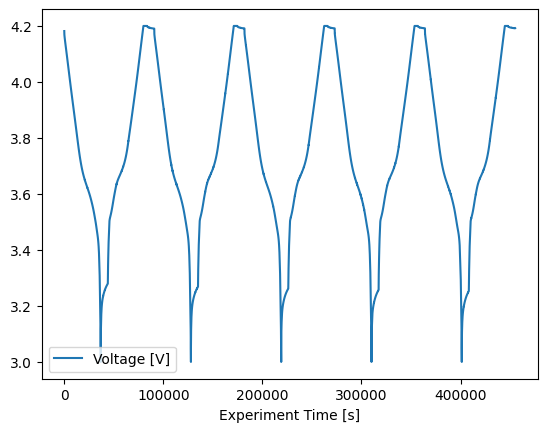

In [14]:
cell.procedure["Sample"].experiment("Break-in Cycles").plot(
    x="Experiment Time [s]", y="Voltage [V]"
)

We can use the `analysis` to further analyse the data. For the `'Break-in Cycles'` we will use the `cycling` analysis module and the functions within. These functions return `Result` objects, so they can be interacted with in the same ways as raw data:

In [15]:
from pyprobe.analysis import cycling

cycling_summary = cycling.summary(
    input_data=cell.procedure["Sample"].experiment("Break-in Cycles")
)
print(type(cycling_summary))

print(cycling_summary.data)

<class 'pyprobe.result.Result'>
shape: (5, 8)
┌───────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┐
│ Cycle ┆ Capacity   ┆ Time [s]   ┆ Charge     ┆ Discharge  ┆ SOH Charge ┆ SOH        ┆ Coulombic  │
│ ---   ┆ Throughput ┆ ---        ┆ Capacity   ┆ Capacity   ┆ [%]        ┆ Discharge  ┆ Efficiency │
│ i64   ┆ [Ah]       ┆ f64        ┆ [Ah]       ┆ [Ah]       ┆ ---        ┆ [%]        ┆ ---        │
│       ┆ ---        ┆            ┆ ---        ┆ ---        ┆ f64        ┆ ---        ┆ f64        │
│       ┆ f64        ┆            ┆ f64        ┆ f64        ┆            ┆ f64        ┆            │
╞═══════╪════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪════════════╡
│ 0     ┆ 0.0        ┆ 28448.2    ┆ 0.041086   ┆ 0.040937   ┆ 100.0      ┆ 100.0      ┆ null       │
│ 1     ┆ 0.082022   ┆ 119273.495 ┆ 0.041247   ┆ 0.041138   ┆ 100.393179 ┆ 100.490732 ┆ 1.001267   │
│ 2     ┆ 0.164407   ┆ 210305.197 ┆ 0.04132  

And it can be plotted as normal too:

<Axes: xlabel='Capacity Throughput [Ah]'>

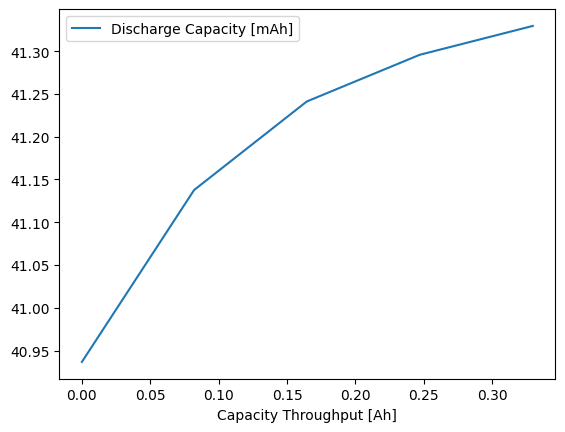

In [16]:
cycling_summary.plot(x="Capacity Throughput [Ah]", y="Discharge Capacity [mAh]")

As the procedure that we imported with the `quick_add_procedure` method does not contain experiment information, the `Break-in Cycles` will not work on it:

In [17]:
cycling_summary = cycling.summary(
    input_data=cell.procedure["Sample Quick"].experiment("Break-in Cycles")
)

2025-02-03 16:25:55,285 - pyprobe.filters - ERROR - Break-in Cycles not in procedure.


ValueError: Break-in Cycles not in procedure.

However, all other filters will still work as expected.